## Codigo utilizado para el TFG títulado "El comportamiento de huida se ve afectado por el tipo de presión antropogénica: el caso de la lubina y la salpa"

**Contexto**: Las distancias a las que los pescadores pueden acercarse a los peces (FID: Flight Innitial Distance) debería ser diferente de acuerdo a la predación humana que estos sufren, si esto fuera cierto, se esperaría que la lubina tuviera distancias más grandes. Utilizamos una muestra de 23 pescadores para analizar estas diferencias en la percepción de la distancias entre las dos especies. Para hacer esta comparación vamos a usar una prueba de comparación de medias parámetrica de medidas dependientes (los datos vienen emparejados: dos observaciones de FID por cada pescador) si los datos cumplen con los supuestos de la prueba (Student t-test), o si no se cumplen, una prueba no paramétrica (Mann Whitney W test).

In [2]:
#librerias necesarias
library(ggplot2)#gramatica de graficos
library(repr)#para controlar el aspecto de la fuente, graficos etc...
library(gridExtra)#para organizar plots
library(lmtest)#test de independencia
library(car)#homogenedidad de varianza y otras funciones

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: carData



In [3]:
options(repr.plot.width=14)#graficos mas anchos

In [4]:
#cargamos los datos
data.peces<-read.csv("mikeldata.csv")#para graficos y test
data.peces.w<-read.csv("mikeldata_wide.csv")#formato ancho, mas facil para hacer sumarios por especie

In [5]:
head(data.peces,10)#primeras 10 lineas de datos
str(data.peces)#estructura de los datos

,ID,FID,min,max,Especie,tamano,razon
,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>
1,1,1.0,1,3,salpa,Grandes,La motivación de una presa grande es mayor y por otra parte en cuanto la tienes ya puedes irte de vuelta a casa
2,2,3.0,1,5,salpa,Grandes,"Cuanto mayor es la pieza, mayor es el combate"
3,3,2.0,1,4,salpa,Pequeños,"Peces que no sobrepasen los 3 kg, ya que la mayoría de las veces, no llegan a ser reproductores"
4,4,3.0,2,4,salpa,Grandes,"No hay mucho que razonar,.la pescasub es una actividad selectiva y se pesca las piezas más grandes dentro de los bancos de peces."
5,5,2.0,1,5,salpa,Grandes,Es una captura más inusual y memorable.
6,6,3.0,1,5,salpa,Grandes,Hay que cuidar las tallas y dejar crecer a los pequeños
7,7,3.0,1,5,salpa,Grandes,"Cuanto mayor es la pieza, mayor es el combate"
8,8,2.5,1,5,salpa,Grandes,En mi opinión la pesca consiste en ser selectivo y no conformista.
9,9,1.0,1,5,salpa,Grandes,"Mayor ejemplar, mayor es el trofeo"


'data.frame':	46 obs. of  7 variables:
 $ ID     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ FID    : num  1 3 2 3 2 3 3 2.5 1 3 ...
 $ min    : num  1 1 1 2 1 1 1 1 1 2 ...
 $ max    : int  3 5 4 4 5 5 5 5 5 4 ...
 $ Especie: chr  "salpa" "salpa" "salpa" "salpa" ...
 $ tamano : chr  "Grandes" "Grandes" "Pequeños" "Grandes" ...
 $ razon  : chr  "La motivación de una presa grande es mayor y por otra parte en cuanto la tienes ya puedes irte de vuelta a casa" "Cuanto mayor es la pieza, mayor es el combate" "Peces que no sobrepasen los 3 kg, ya que la mayoría de las veces, no llegan a ser reproductores" "No hay mucho que razonar,.la pescasub es una actividad selectiva y se pesca las piezas más grandes dentro de lo"| __truncated__ ...


In [6]:
summary(data.peces.w$Lub_FID)
summary(data.peces.w$Sal_FID)
sd(data.peces.w$Lub_FID)
sd(data.peces.w$Sal_FID)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.500   2.913   3.000  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       2       4       4       5      10 

[1] 1.940315

[1] 2.435532

In [6]:
a<-ggplot(data.peces, aes(x=Especie, y=FID, fill=Especie)) +
    geom_boxplot(alpha=0.7) + geom_jitter(width = 0.1)+
    stat_summary(fun=mean, geom="point", shape=4, size=10, color="black", fill="red") +
    theme(legend.position="none")+ theme_bw()+ ggtitle("a")+theme(legend.position = "none")
#la cruz indica la media
b<-ggplot(data.peces, aes(x=Especie, y=min, fill=Especie)) + geom_jitter(width = 0.1)+
    geom_boxplot(alpha=0.7) +ggtitle("b")+
    stat_summary(fun=mean, geom="point", shape=4, size=10, color="black", fill="red") +
    theme(legend.position="none")+ theme_bw()+ theme(legend.position = "none")
c<-ggplot(data.peces, aes(x=Especie, y=max, fill=Especie)) +
    geom_boxplot(alpha=0.7) + geom_jitter(width = 0.1)+
    stat_summary(fun=mean, geom="point", shape=4, size=10, color="black", fill="red") +
    theme(legend.position="none")+ theme_bw()+ggtitle("c")+theme(legend.position = "none")

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


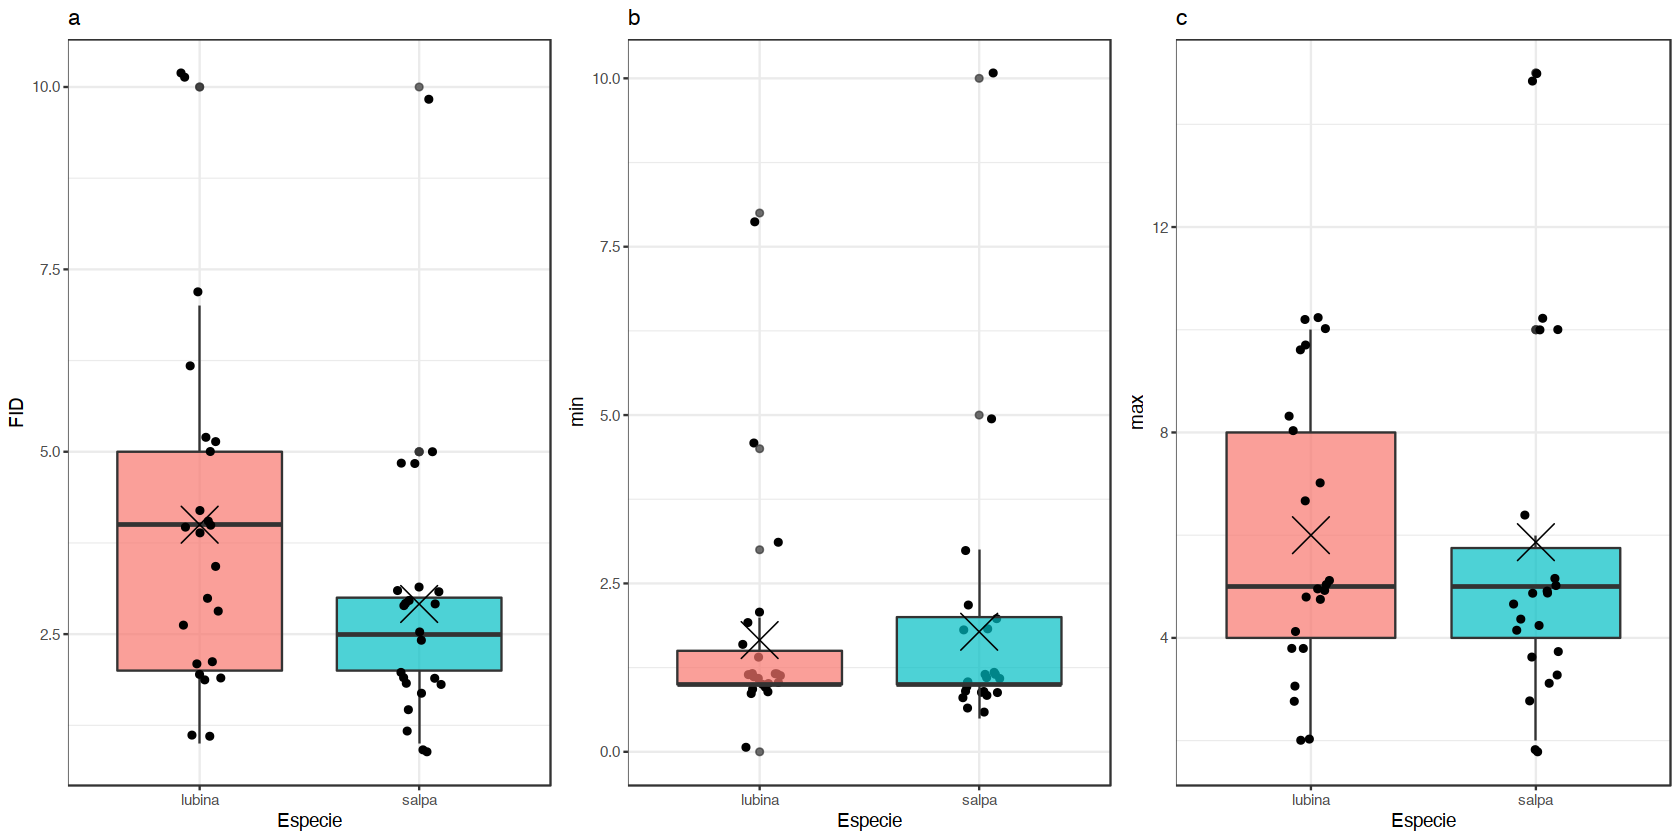

In [84]:
library(gridExtra)
grid.arrange(a,b,c,ncol=3)

Hay diferencias en FID entre especies, las lubinas escapan a mayores distancias de aproximación (Fig. a). Los mínimos (Fig. b) u máximos (Fig. c) no difieren. Veamos los supuestos antes de hacer el test. 

In [7]:
#centremonos en solos FID, normalidad
d<-ggplot(data.peces,aes(x=FID,fill=Especie))+
  geom_density(alpha=0.6)+theme_bw()+ggtitle("a")+theme(legend.position = "none")
#los FID no son normales, particularmente para la salpa

In [8]:
e<-ggplot(data.peces, aes(x=FID)) +
  geom_histogram(aes(y=..density..,fill=Especie), color="grey30",alpha=0.6)+
  stat_density(geom="line")+
  facet_grid(Especie~.)+ggtitle("b")

In [9]:
f<-ggplot(data.peces, aes(sample = FID,color=Especie,alpha=0.6))+stat_qq() + stat_qq_line() + theme_bw()+
ggtitle("c")+ theme(legend.position = "none")

In [10]:
# Multiple ECDFs
g<-ggplot(data.peces, aes(FID, colour = Especie)) + stat_ecdf()+theme_bw()+ggtitle("d")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



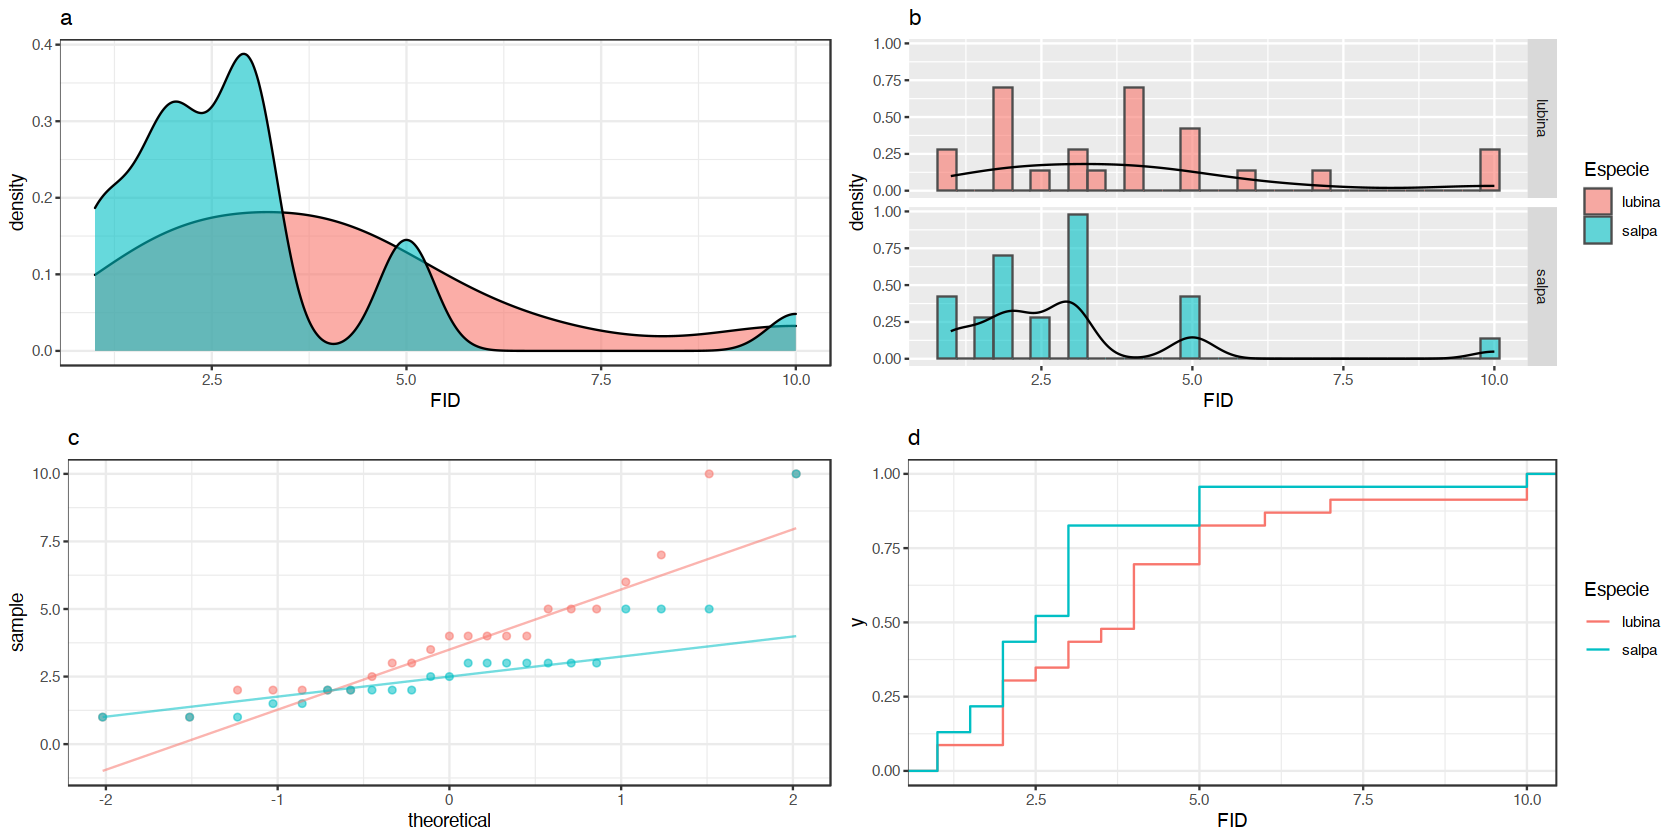

In [11]:
grid.arrange(d,e,f,g,ncol=2)

Visualmente se ven problemas de normalidad en los FID tanto usando graficos de densidad (Fig a), histogramas (Fig b), diagramas de qqplot (Fig c) y función de acumulación empírica (Fig d)

In [12]:
shapiro.test(data.peces.w$Lub_FID)#problemas de normalidad
shapiro.test(data.peces.w$Sal_FID)


	Shapiro-Wilk normality test

data:  data.peces.w$Lub_FID
W = 0.74709, p-value = 6.102e-05



	Shapiro-Wilk normality test

data:  data.peces.w$Sal_FID
W = 0.86977, p-value = 0.006346


In [13]:
leveneTest(FID~Especie,data=data.peces)#no hay problemas de homogenedidad de varianza de IID entre Especies

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.301837,0.2600502
,44,NA,NA


In [14]:
dwtest(FID~Especie,data=data.peces)#problemas de independencia de observaciones


	Durbin-Watson test

data:  FID ~ Especie
DW = 1.4816, p-value = 0.02648
alternative hypothesis: true autocorrelation is greater than 0


Hay problemas en los supuestos estadísticos para la prueb de t de Student, por lo tanto tenemos que usar la pruebba no parámetrica Man Whiney Wilcoxon paired test.

In [15]:
#paired t-test
wilcox.test(FID~Especie,data=data.peces,exact = F,paired = T)#AJA!


	Wilcoxon signed rank test with continuity correction

data:  FID by Especie
V = 133, p-value = 0.006922
alternative hypothesis: true location shift is not equal to 0


In [16]:
t.test(log10(FID)~Especie,data=data.peces,exact = F,paired = T)
#se podrían tranformar los datos con logarítmos, pero es más díficl de intepretar. Quizas se puede añadir para dar más fuerza al resultado.


	Paired t-test

data:  log10(FID) by Especie
t = 2.6012, df = 22, p-value = 0.0163
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0268118 0.2377002
sample estimates:
mean of the differences 
               0.132256 


In [17]:
#tamaño del efecto
Zstat<-qnorm(0.07744/2)
eff.size<-abs(Zstat)/sqrt(23)
eff.size#tamaño del efecto moderado

[1] 0.3681816

In [18]:
#analisis de la potencia conseguida con el test en base a n y el tamaño del efecto
library(pwr)
(p.out<-pwr.t.test(d=eff.size,sig.level=.05, n = 23,type=c("paired")))
#tenemos una potencia baja, es decir hay cierto riego de tener un falso positivo
#si el test no hubiera dado diferencias, tendriamos el riesgo de tener un falso negativo


     Paired t test power calculation 

              n = 23
              d = 0.3681816
      sig.level = 0.05
          power = 0.393228
    alternative = two.sided

NOTE: n is number of *pairs*



     Paired t test power calculation 

              n = 59.84966
              d = 0.3681816
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number of *pairs*


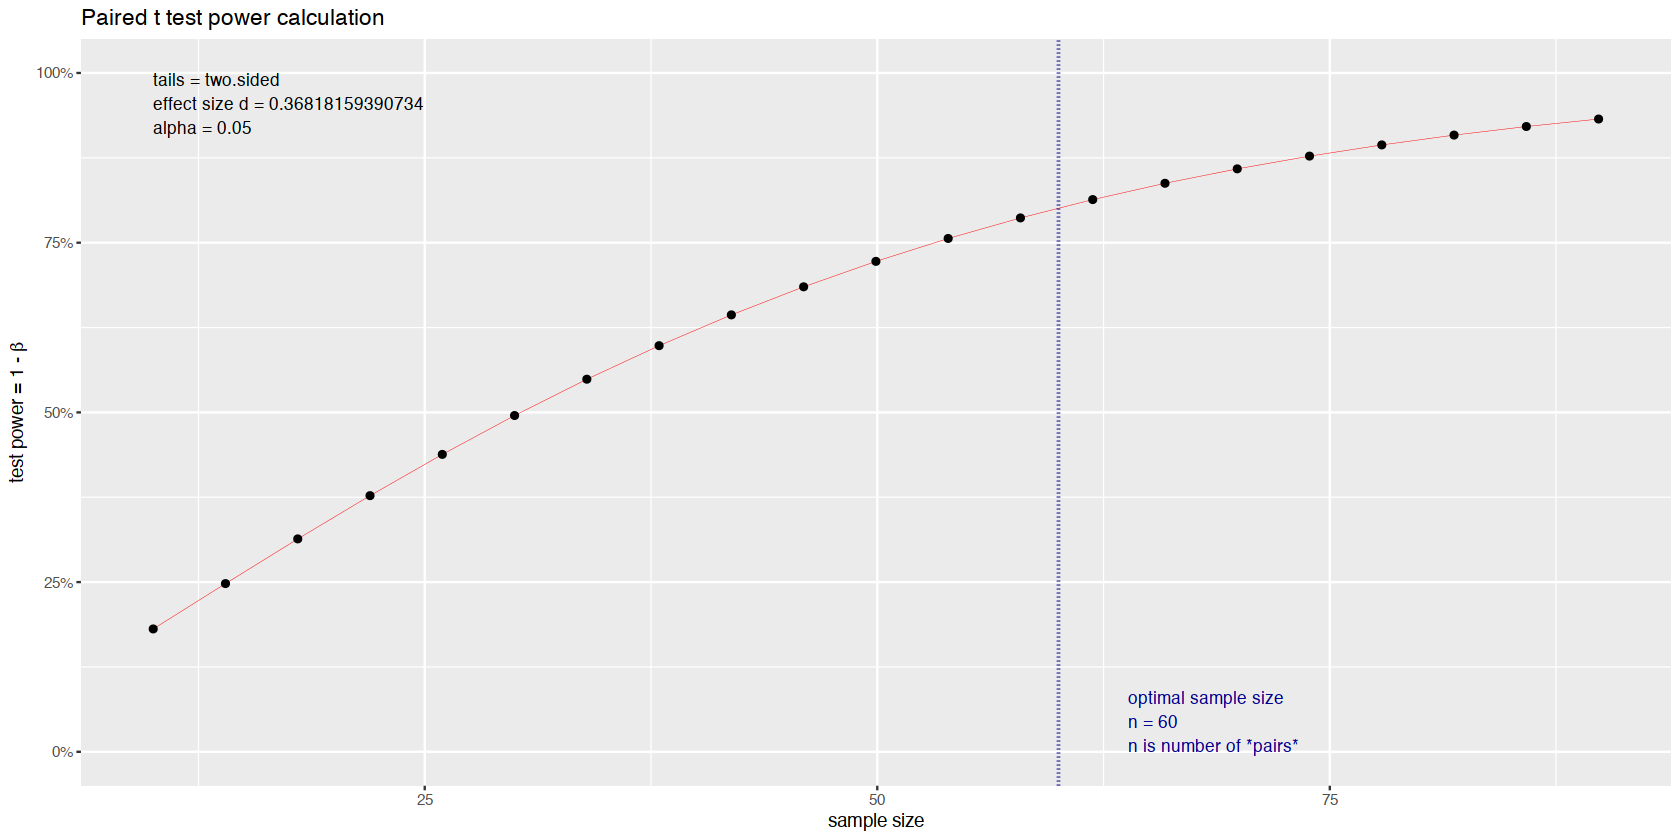

In [19]:
(p.out2<-pwr.t.test(d=eff.size,sig.level=.05, power = 0.8,type=c("paired")))
plot(p.out2)
#para ese tamano del efecto y una potencia optima de 0.8 hubieramos necesitado una muesta de 59 pescadores

In [20]:
summary(data.peces.w$Lub_FID)
summary(data.peces.w$Sal_FID)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.500   2.913   3.000  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       2       4       4       5      10 

**Interpretación estadística**: Los pescadores perciben que pueden acercarse más a la salpa (mediana = 2.5m) que a la lubina (mediana = 4m). Esta diferencia de 1.5 m es significativa (V = 133, p < 0.01, n = 23) y tiene un tamaño del efecto pequeño (r = 0.37). Aunque la diferencia es significativa necesitariamos doblar el tamaño de la muestra para tener más certeza en esta diferencia, es decir para tener más potencia.

## Peces grandes o peces pequenos

The exact test of goodness of fit is used when comparing the proportions of the sample space of a nominal categorical variable against an expected proportion. The test is termed exact since we do not calculate a test statistic that measures how different our findings are from the expected values under a null hypothesis and then calculate the probability of getting a test statistic this or more extreme. Instead, we calculate the p value directly.

In [5]:
data.peces.w<-read.csv("mikeldata_wide.csv")#formato ancho, mas facil para hacer sumarios por especie
data.peces.w

ID,Lub_FID,Lub_min,Lub_max,Sal_FID,Sal_min,Sal_max,tamano,razon
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,1.0,1.0,3,1.0,0.0,4,Grandes,La motivación de una presa grande es mayor y por otra parte en cuanto la tienes ya puedes irte de vuelta a casa
2,3.0,1.0,5,2.0,1.0,3,Grandes,"Cuanto mayor es la pieza, mayor es el combate"
3,2.0,1.0,4,1.0,1.0,4,Pequeños,"Peces que no sobrepasen los 3 kg, ya que la mayoría de las veces, no llegan a ser reproductores"
4,3.0,2.0,4,2.0,1.0,2,Grandes,"No hay mucho que razonar,.la pescasub es una actividad selectiva y se pesca las piezas más grandes dentro de los bancos de peces."
5,2.0,1.0,5,2.0,1.0,5,Grandes,Es una captura más inusual y memorable.
6,3.0,1.0,5,5.0,1.5,5,Grandes,Hay que cuidar las tallas y dejar crecer a los pequeños
7,3.0,1.0,5,2.0,1.0,3,Grandes,"Cuanto mayor es la pieza, mayor es el combate"
8,2.5,1.0,5,3.5,1.5,7,Grandes,En mi opinión la pesca consiste en ser selectivo y no conformista.
9,1.0,1.0,5,5.0,1.0,5,Grandes,"Mayor ejemplar, mayor es el trofeo"


In [4]:
table(data.peces.w$tamano)

#una persona no respondio, es interesante encontrar una persona que hace submarinismo para no para cazar.
#comparemos entonces 21 frente a 1, aunque no sea evidente hagamos el análisis.


          Grandes Pequeños 
       1       21        1 

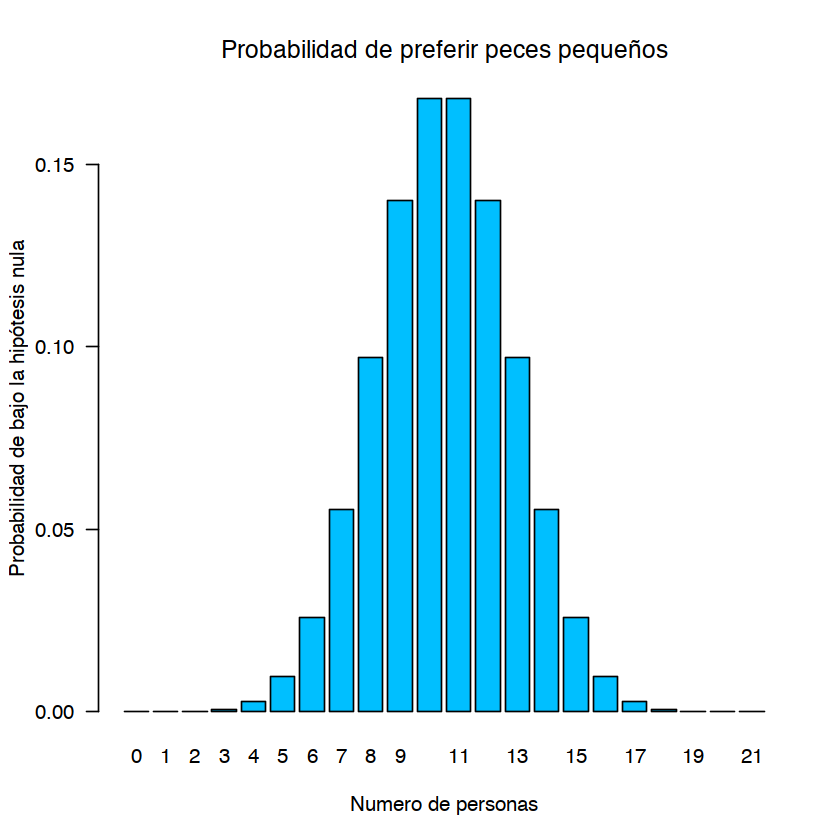

In [9]:
#Binomial exact goodness of fit test
n <- 21
k <- 1
p <- 0.5

x <- seq(0, n)
y <- dbinom(x,
            size = n,
            prob = p)

barplot(height = y,
        names.arg = x,
        col = "deepskyblue",
        main = "Probabilidad de preferir peces pequeños",
        xlab = "Numero de personas",
        ylab = "Probabilidad de bajo la hipótesis nula",
        las = 1)
        #la probabilidad de que una persona de 22 prefiera cazar peces pequenos es muy baja

In [10]:
binom.test(k,
           n,
           p = p,
           alternative = "two.sided",
           conf.level = 0.95)


	Exact binomial test

data:  k and n
number of successes = 1, number of trials = 21, p-value = 2.098e-05
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.001204883 0.238159910
sample estimates:
probability of success 
            0.04761905 


En particular, en vista de la frecuencia observada frente a la esperada, la probabilidad de que 1 persona de 21 prefiera pescar peces pequeños es de 0.000002098.

In [21]:
citation("pwr")


To cite package ‘pwr’ in publications use:

  Stephane Champely (2020). pwr: Basic Functions for Power Analysis. R
  package version 1.3-0. https://CRAN.R-project.org/package=pwr

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {pwr: Basic Functions for Power Analysis},
    author = {Stephane Champely},
    year = {2020},
    note = {R package version 1.3-0},
    url = {https://CRAN.R-project.org/package=pwr},
  }


In [22]:
citation("ggplot2")


To cite ggplot2 in publications, please use:

  H. Wickham. ggplot2: Elegant Graphics for Data Analysis.
  Springer-Verlag New York, 2016.

A BibTeX entry for LaTeX users is

  @Book{,
    author = {Hadley Wickham},
    title = {ggplot2: Elegant Graphics for Data Analysis},
    publisher = {Springer-Verlag New York},
    year = {2016},
    isbn = {978-3-319-24277-4},
    url = {https://ggplot2.tidyverse.org},
  }


In [23]:
#para citar R
citation()


To cite R in publications use:

  R Core Team (2020). R: A language and environment for statistical
  computing. R Foundation for Statistical Computing, Vienna, Austria.
  URL https://www.R-project.org/.

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {R: A Language and Environment for Statistical Computing},
    author = {{R Core Team}},
    organization = {R Foundation for Statistical Computing},
    address = {Vienna, Austria},
    year = {2020},
    url = {https://www.R-project.org/},
  }

We have invested a lot of time and effort in creating R, please cite it
when using it for data analysis. See also ‘citation("pkgname")’ for
citing R packages.
